<a href="https://colab.research.google.com/github/Kiranmaibokka/Demo/blob/master/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore') 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [9]:
import io
mall_data = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [10]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
mall_data.shape

(200, 5)

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

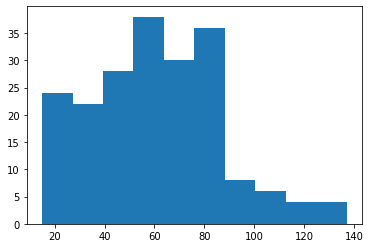

In [14]:
plt.hist(mall_data['Annual Income (k$)'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

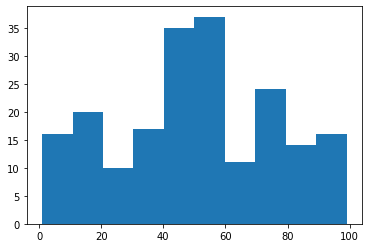

In [16]:
plt.hist(mall_data['Spending Score (1-100)'])

In [27]:
mall_data = mall_data.rename(columns={'Annual Income (k$)':'Annualincome','Spending Score (1-100)':'Spendscore'})

In [28]:
mall_data

,CustomerID,Gender,Age,Annualincome,Spendscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


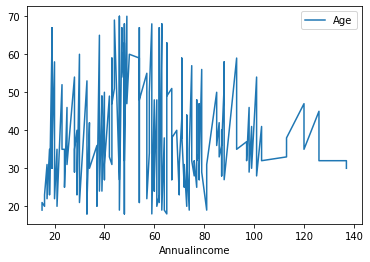

In [30]:
fig, ax = plt.subplots() # Create the figure and axes object

mall_data.plot(x = 'Annualincome', y = 'Age', ax = ax) 


<BarContainer object of 200 artists>

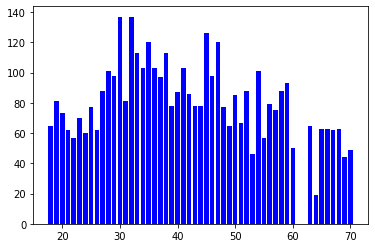

In [32]:
plt.bar(mall_data['Age'],mall_data['Annualincome'], color='blue')

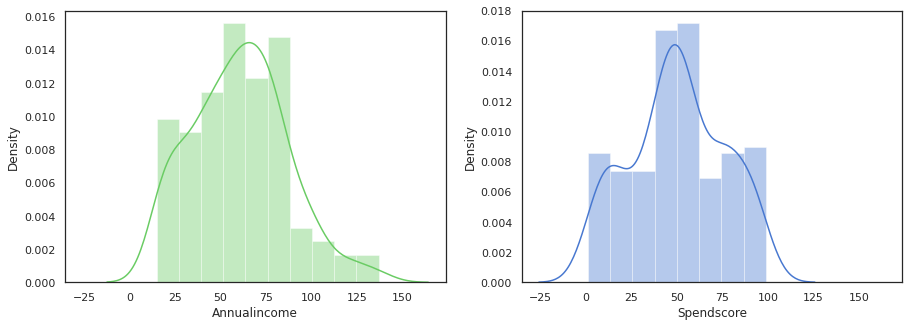

In [34]:
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

sns.distplot(mall_data['Annualincome'],color="g", ax=axes[0])
sns.distplot(mall_data['Spendscore'],color="b", ax=axes[1])


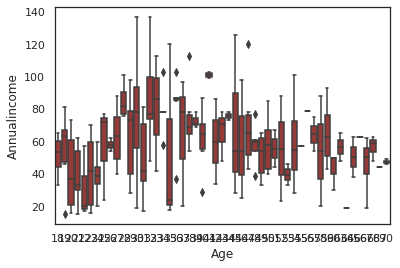

In [35]:
sns.boxplot(x=mall_data['Age'], y=mall_data['Annualincome'], data=mall_data, color='brown')

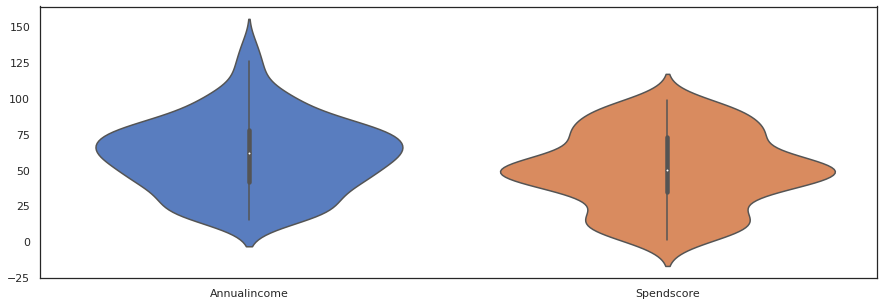

In [37]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(figsize=(15, 5), sharex=True)
sns.violinplot( ax=axes,data = mall_data.iloc[:, 3:5]) 


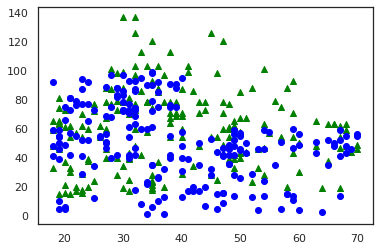

In [44]:
plt.scatter(x = mall_data['Age'], y=mall_data['Annualincome'],c='green',marker="^")
plt.scatter(x = mall_data['Age'], y=mall_data['Spendscore'],c='blue', marker="o")

In [47]:
mall_data.groupby('Age')['Spendscore'].sum()

Age
18    240
19    318
20    201
21    334
22    210
23    380
24    286
25    119
26    109
27    362
28    280
29    383
30    562
31    511
32    726
33    163
34    196
35    575
36    315
37     46
38    379
39    254
40    285
41     56
42     37
43    102
44     27
45    113
46     64
47    171
48    209
49    299
50    229
51     93
52     42
53     50
54    143
55     58
56     35
57     56
58     30
59    132
60    109
63     94
64      3
65     87
66     98
67    166
68    146
69     46
70    111
Name: Spendscore, dtype: int64

In [61]:
import numpy as np
X = np.array(list(zip(mall_data['Annualincome'],mall_data['Spendscore'])))
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [73]:
from sklearn.cluster import KMeans
def generate():
    number_of_clusters = 5
    kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0) 
    return kmeans,kmeans.fit_predict(X)
    return
km4, y_means = generate()

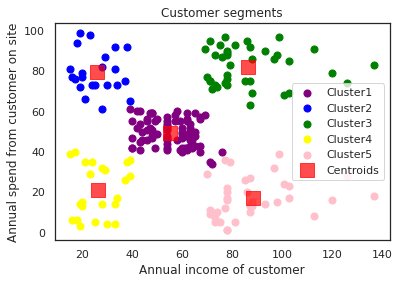

In [74]:
def generate():
    plt.scatter(X[y_means==0,0],X[y_means==0,1],c='purple',s=50,label='Cluster1')
    plt.scatter(X[y_means==1,0],X[y_means==1,1],c='blue',s=50,label='Cluster2')
    plt.scatter(X[y_means==2,0],X[y_means==2,1],c='green',s=50,label='Cluster3')
    plt.scatter(X[y_means==3,0],X[y_means==3,1],c='yellow',s=50,label='Cluster4')
    plt.scatter(X[y_means==4,0],X[y_means==4,1],c='pink',s=50,label='Cluster5')

    
    

    plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
    
    plt.title('Customer segments')
    plt.xlabel('Annual income of customer')
    plt.ylabel('Annual spend from customer on site')
    
    plt.legend()
    plt.show()
    return 
generate()


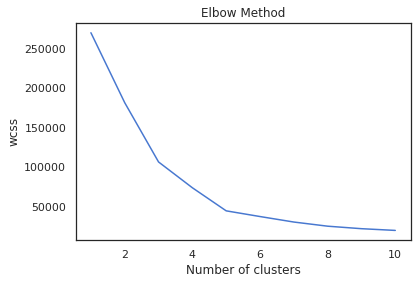

In [71]:
def generate():
    wcss = {}
    for i in range(1,11):
    
        km=KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        km.fit(X)
    
        wcss[i] = km.inertia_
    
    plt.plot(list(wcss.keys()), list(wcss.values()))

    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('wcss')
    plt.show()
    return
generate()